In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Retail Store Demand dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df.columns = ['Order_Date','Store','Item','Sales']
df.head()

,Order_Date,Store,Item,Sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  913000
Number of columns:  4


In [5]:
print('Name of columns: ',df.columns.tolist())

Name of columns:  ['Order_Date', 'Store', 'Item', 'Sales']


In [6]:
#checking unique values
print('Unique values: \n',df.nunique())

Unique values: 
 Order_Date    1826
Store           10
Item            50
Sales          213
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Order_Date  913000 non-null  object
 1   Store       913000 non-null  int64 
 2   Item        913000 non-null  int64 
 3   Sales       913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [8]:
unique_rows = pd.DataFrame(df['Item'].value_counts()).reset_index()
unique_rows.head()

,index,Item
0,50,18260
1,13,18260
2,23,18260
3,22,18260
4,21,18260


In [9]:
unique_rows.columns = ['Item','count'] 

In [10]:
unique_rows.head(2)

,Item,count
0,50,18260
1,13,18260


In [11]:
print(unique_rows)
print('Unique Item count: ',df['Item'].nunique())

    Item  count
0     50  18260
1     13  18260
2     23  18260
3     22  18260
4     21  18260
5     20  18260
6     19  18260
7     18  18260
8     17  18260
9     16  18260
10    15  18260
11    14  18260
12    12  18260
13    49  18260
14    11  18260
15    10  18260
16     9  18260
17     8  18260
18     7  18260
19     6  18260
20     5  18260
21     4  18260
22     3  18260
23     2  18260
24    24  18260
25    25  18260
26    26  18260
27    27  18260
28    48  18260
29    47  18260
30    46  18260
31    45  18260
32    44  18260
33    43  18260
34    42  18260
35    41  18260
36    40  18260
37    39  18260
38    38  18260
39    37  18260
40    36  18260
41    35  18260
42    34  18260
43    33  18260
44    32  18260
45    31  18260
46    30  18260
47    29  18260
48    28  18260
49     1  18260
Unique Item count:  50


In [12]:
print( unique_rows.head(1)['Item'].array )

<PandasArray>
[50]
Length: 1, dtype: int64


# Will make predictions on Item=50.

In [13]:
data = df.loc[df['Item']==50]
data.head(2)

,Order_Date,Store,Item,Sales
894740,2013-01-01,1,50,30
894741,2013-01-02,1,50,32


In [14]:
data.reset_index(inplace=True)
data

,index,Order_Date,Store,Item,Sales
0,894740,2013-01-01,1,50,30
1,894741,2013-01-02,1,50,32
2,894742,2013-01-03,1,50,25
3,894743,2013-01-04,1,50,32
4,894744,2013-01-05,1,50,35
...,...,...,...,...,...
18255,912995,2017-12-27,10,50,63
18256,912996,2017-12-28,10,50,59
18257,912997,2017-12-29,10,50,74
18258,912998,2017-12-30,10,50,62


In [15]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

<ipython-input-15-6a6ebeff9c0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Order_Date'] = pd.to_datetime(data['Order_Date'])


In [16]:
cols_drop = ['index','Store','Item']
data.drop(cols_drop,axis=1,inplace=True)

C:\Users\ayush\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
print('No of rows: ',data.shape[0])
print('No of columns: ',data.shape[1])
print('Min Date: ',data['Order_Date'].min())
print('Max Date: ',data['Order_Date'].max())

No of rows:  18260
No of columns:  2
Min Date:  2013-01-01 00:00:00
Max Date:  2017-12-31 00:00:00


In [18]:
data.head()

,Order_Date,Sales
0,2013-01-01,30
1,2013-01-02,32
2,2013-01-03,25
3,2013-01-04,32
4,2013-01-05,35


In [19]:
monthly_data = data.groupby([pd.Grouper(key="Order_Date",freq='MS')])['Sales'].sum().reset_index().sort_values("Order_Date")
print(monthly_data.head(5))
print(monthly_data.shape)

  Order_Date  Sales
0 2013-01-01  11467
1 2013-02-01  11566
2 2013-03-01  15687
3 2013-04-01  17518
4 2013-05-01  19001
(60, 2)


In [20]:
daily_data = data
daily_data.head(2)

,Order_Date,Sales
0,2013-01-01,30
1,2013-01-02,32


In [21]:
daily_data.set_index("Order_Date",inplace=True)
daily_data.head(5)

,Sales
Order_Date,
2013-01-01,30
2013-01-02,32
2013-01-03,25
2013-01-04,32
2013-01-05,35


[Text(0.5, 0, 'Order_Date'), Text(0, 0.5, 'Sales - Item_50')]

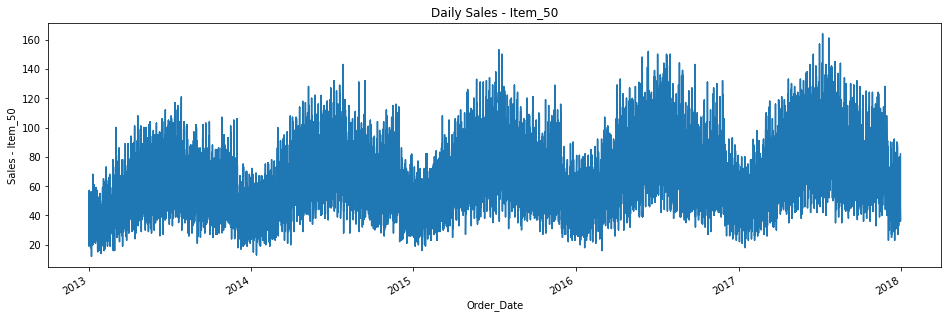

In [22]:
daily_graph = daily_data['Sales'].plot(figsize = (16,5), title="Daily Sales - Item_50")
daily_graph.set(xlabel='Order_Date',ylabel='Sales - Item_50')
#daily_data['Sales'].plot(figsize = (16,5))

In [23]:
monthly_data.set_index("Order_Date",inplace=True)
monthly_data.head(5)

,Sales
Order_Date,
2013-01-01,11467
2013-02-01,11566
2013-03-01,15687
2013-04-01,17518
2013-05-01,19001


[Text(0.5, 0, 'Order_Date'), Text(0, 0.5, 'Sales - Item_50')]

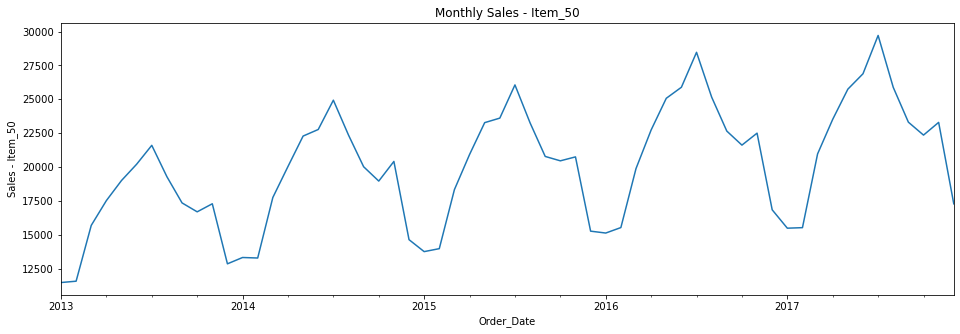

In [24]:
monthly_graph = monthly_data['Sales'].plot(figsize = (16,5), title="Monthly Sales - Item_50")
monthly_graph.set(xlabel='Order_Date',ylabel='Sales - Item_50')

## Seasonal decomposing

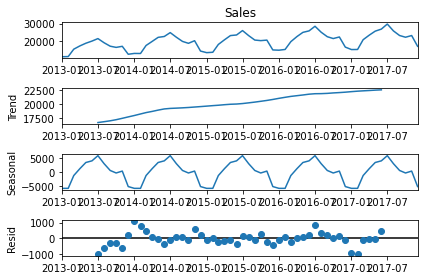

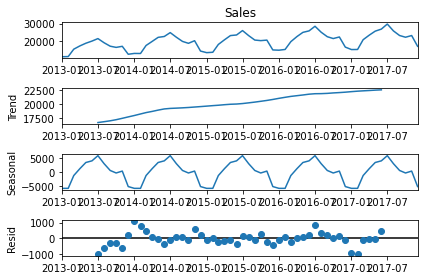

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(monthly_data["Sales"],model = "additive").plot()

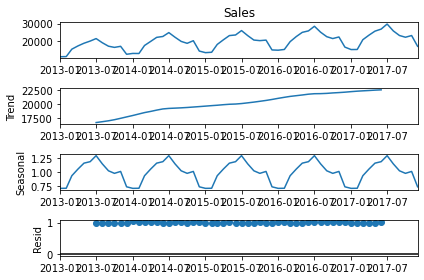

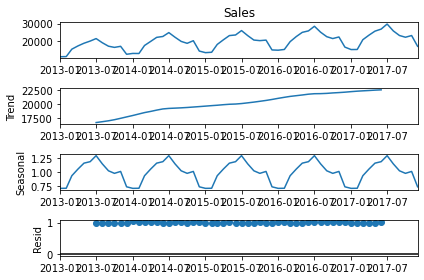

In [26]:
seasonal_decompose(monthly_data["Sales"],model = "multiplicative").plot()

In [27]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 11, 9
# decomposition = seasonal_decompose(monthly_data["Sales"],model = "multiplicative")
# fig = decomposition.plot(seasonal=False, trend=False, resid=True)
# plt.show()

## Testing if Data is stationary or not

In [28]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

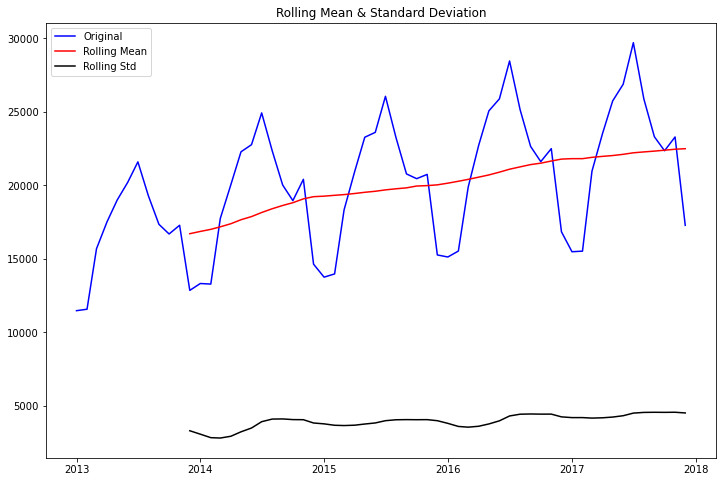

Results of Dickey-Fuller Test:
p-value = 0.4481. The series is likely non-stationary.
Test Statistic                 -1.667200
p-value                         0.448086
#Lags Used                     20.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [30]:
test_stationarity(monthly_data['Sales'])

In [31]:
#Ho: It is non stationary
#H1: It is stationary

# Dickey-Fuller test function

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [32]:
adfuller_test(monthly_data['Sales'])

ADF Test Statistic : -4.913150638004197
p-value : 3.2876084579836815e-05
#Lags Used : 11
Number of Observations Used : 48
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [33]:
from pmdarima import auto_arima
auto_arima(monthly_data['Sales'], seasonal=True, m=12,max_p=25, max_d=5,max_q=7, max_P=7, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -363.970
Date:                            Tue, 06 Apr 2021   AIC                            729.940
Time:                                    22:36:12   BIC                            731.790
Sample:                                         0   HQIC                           730.636
                                             - 60                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.116e+05   6.05e+04      5.152      0.000    1.93e+05     4.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.27   Prob(JB):                         0.39
Heteroskedasticity (H):               0.63   Skew:                            -0.49
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Train Test Split

In [34]:
train_data = monthly_data[:len(monthly_data)-12]
test_data = monthly_data[len(monthly_data)-12:]

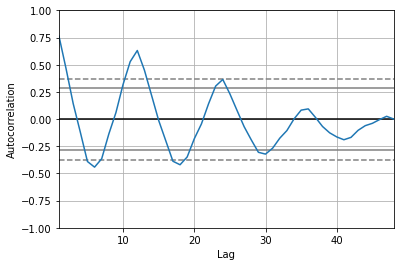

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train_data['Sales'])
plt.show()

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\ayush\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


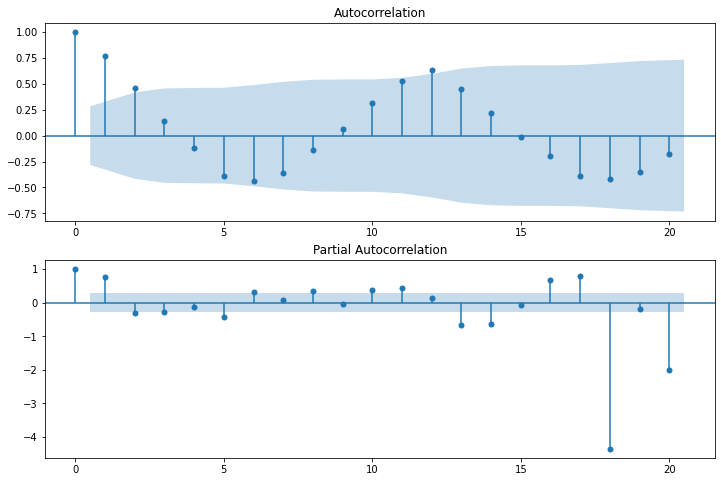

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_data['Sales'],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_data['Sales'],lags=20,ax=ax2)

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
arima_model = SARIMAX(train_data['Sales'], order = (0,1,0), seasonal_order = (0,1,0,12))
arima_result = arima_model.fit()
arima_result.summary()

C:\Users\ayush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ayush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -271.453
Date:                            Tue, 06 Apr 2021   AIC                            544.907
Time:                                    22:36:13   BIC                            546.462
Sample:                                01-01-2013   HQIC                           545.443
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.188e+05   7.39e+04      4.314      0.000    1.74e+05    4.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.44   Jarque-Bera (JB):                 2.72
Prob(Q):                              0.23   Prob(JB):                         0.26
Heteroskedasticity (H):               0.30   Skew:                            -0.68
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
arima_pred = arima_result.predict(start = len(train_data), end = len(monthly_data)-1, typ="levels").rename("SARIMA Predictions")
arima_pred

2017-01-01    16698.0
2017-02-01    17102.0
2017-03-01    21458.0
2017-04-01    24309.0
2017-05-01    26647.0
2017-06-01    27463.0
2017-07-01    30043.0
2017-08-01    26732.0
2017-09-01    24227.0
2017-10-01    23190.0
2017-11-01    24074.0
2017-12-01    18413.0
Freq: MS, Name: SARIMA Predictions, dtype: float64

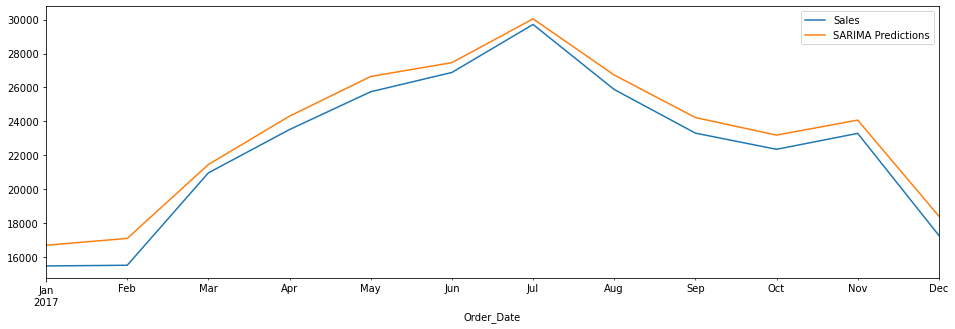

In [41]:
test_data['Sales'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [42]:
from statsmodels.tools.eval_measures import rmse
arima_rmse_error = rmse(test_data['Sales'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = test_data['Sales'].mean()
arima_mape = np.mean(np.abs((arima_pred - test_data['Sales']) / test_data['Sales'])) * 100
print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}\nMAPE: {arima_mape}')

MSE Error: 856487.25
RMSE Error: 925.4659637177372
Mean: 22494.916666666668
MAPE: 4.286219358723903


In [43]:
test_data['ARIMA_Predictions'] = arima_pred
test_data

<ipython-input-43-4f171bc91ed9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ARIMA_Predictions'] = arima_pred


,Sales,ARIMA_Predictions
Order_Date,,
2017-01-01,15480,16698.0
2017-02-01,15520,17102.0
2017-03-01,20966,21458.0
2017-04-01,23520,24309.0
2017-05-01,25746,26647.0
2017-06-01,26883,27463.0
2017-07-01,29712,30043.0
2017-08-01,25879,26732.0
2017-09-01,23308,24227.0


# Future sales Forecasting

In [44]:
from pandas.tseries.offsets import DateOffset
future_dates = [monthly_data.index[-1] + DateOffset(months=x) for x in range(0,36)]

In [45]:
future_dataset = pd.DataFrame(index=future_dates[1:],columns = monthly_data.columns)

In [46]:
future_dataset.tail()

,Sales
2020-07-01,NaN
2020-08-01,NaN
2020-09-01,NaN
2020-10-01,NaN
2020-11-01,NaN


In [47]:
future_df = pd.concat([monthly_data,future_dataset])

## Training on full data

In [48]:
arima_model = SARIMAX(monthly_data['Sales'], order = (0,1,0), seasonal_order = (0,1,0,12))
arima_result = arima_model.fit()
arima_result.summary()

C:\Users\ayush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ayush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -363.970
Date:                            Tue, 06 Apr 2021   AIC                            729.940
Time:                                    22:36:15   BIC                            731.790
Sample:                                01-01-2013   HQIC                           730.636
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.116e+05   6.05e+04      5.152      0.000    1.93e+05     4.3e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.27   Prob(JB):                         0.39
Heteroskedasticity (H):               0.63   Skew:                            -0.49
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

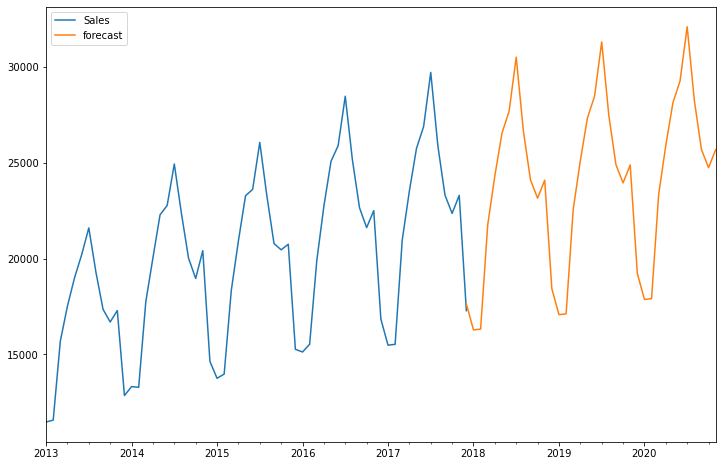

In [49]:
future_df['forecast'] = arima_result.predict(start=59, end=96 , dynamic = True)
future_df[['Sales','forecast']].plot(figsize=(12,8))